# Gestión de Riesgos por Simulaciones
Autor: José Carlos Machicao (GestioDinámica)<br>
Actualizado: 2019_11_07<br>

La gestión de riesgos es una subdisciplina de la gestión. Hacia 1950, fue concebida como una reacción bastante lúcida a las incertidumbres que se presentaban al tratar de implementar logros en las organizaciones. 

Estudia la toma de decisiones en situaciones de incertidumbre. Utiliza la probabilidad como un dato para la toma de decisiones, evaluando el impacto en los logros que se implementa en alguna acción organizacional. 

El reto de la gestión de riesgos hoy (2020) es que todavía permanece como un enfoque de tránsito con demasiadas bases en los enfoques deterministas y reduccionistas de gestión, pero en el futuro evolucionará como gestión de inestabilidades en sistemas complejos.<br>

## Carga de Librerías y Archivos

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from google.colab import files
from statsmodels.graphics.mosaicplot import mosaic
from google.colab import files
%load_ext google.colab.data_table

In [0]:
#@title Definición manual de datos
riesgo =        ['R01','R02','R03','R04','R05','R06','R07','R08','R09','R10',
                 'R11','R12','R13','R14','R15','R16','R17','R18','R19','R20']
impac =         [2.0,4.5,4.3,3.0,7.0, 5.0,3.3,5.3,5.5,7.5, 9.0,8.0,4.0,3.9,3.0, 4.5,5.0,9.0,7.0,6.0]
proba =         [3.0,4.0,6.0,8.3,7.2, 8.5,4.0,5.0,6.0,3.5, 3.0,2.3,8.0,3.5,9.5, 2.2,2.0,8.3,3.0,2.0]
supervisor =  ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B']
area =        ['Z1', 'Z3', 'Z3', 'Z2', 'Z1', 'Z1', 'Z3', 'Z3', 'Z2', 'Z1', 'Z1', 'Z3', 'Z3', 'Z2', 'Z1', 'Z1', 'Z3', 'Z3', 'Z2', 'Z1']

In [0]:
#@title Carga Alternativa de Archivo Externo
uploaded = files.upload()
for fn in uploaded.keys():
  print('Se ha cargado el archivo "{name}" de longitud {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving riesgos_bd.xlsx to riesgos_bd.xlsx
Se ha cargado el archivo "riesgos_bd.xlsx" de longitud 11897 bytes


In [3]:
#data_df.read_excel('bd_riesgos.xlsx')
data_df = pd.DataFrame([riesgo, impac, proba, supervisor, area]).transpose()
data_df.columns = ['nombre', 'impacto', 'probab', 'superv', 'area']
data_df['impacto'] = pd.to_numeric(data_df.impacto, downcast='float')
data_df['probab'] = pd.to_numeric(data_df.probab, downcast='float')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
nombre     20 non-null object
impacto    20 non-null float32
probab     20 non-null float32
superv     20 non-null object
area       20 non-null object
dtypes: float32(2), object(3)
memory usage: 768.0+ bytes


## Exploración y Caracterización de Datos

In [5]:
data_df

,nombre,impacto,probab,superv,area
0,R01,2.0,3.0,A,Z1
1,R02,4.5,4.0,B,Z3
2,R03,4.3,6.0,C,Z3
3,R04,3.0,8.3,A,Z2
4,R05,7.0,7.2,B,Z1
5,R06,5.0,8.5,C,Z1
6,R07,3.3,4.0,A,Z3
7,R08,5.3,5.0,B,Z3
8,R09,5.5,6.0,C,Z2
9,R10,7.5,3.5,A,Z1


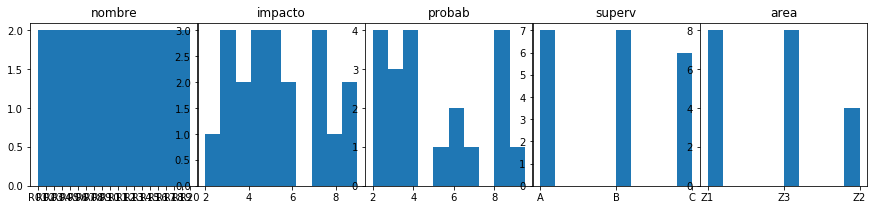

In [4]:
n_cols = len(data_df.columns)
fig, axs = plt.subplots(1,n_cols, figsize=(15,3), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=.001)
axs = axs.ravel()
for i in range(n_cols):
    axs[i].hist(data_df[data_df.columns[i]])
    axs[i].set_title(data_df.columns[i])

## Matriz de Impacto y Probabilidad

In [0]:
var_color = data_df.area
var_label = data_df.area
eje_x = data_df.impacto
eje_y = data_df.probab

In [0]:
#@title Gráfica de Valor Esperado (simple)
plt.figure(figsize=(12,8))
plt.scatter(eje_x, eje_y, s=100, marker='s',
            c=pd.factorize(var_color)[0]+1,
            cmap='Set1')
for j in range(20):
  plt.text(eje_x[j], eje_y[j], var_label[j],
           fontsize=15)
plt.xlabel('eje_x')
plt.ylabel('eje_y')
plt.legend()
plt.show()

In [0]:
data_df['VER'] = data_df.impacto * data_df.probab

In [0]:
#@title Gráfica de Valor Esperado con diámetros VER
plt.figure(figsize=(12,8))
plt.scatter(data_df.impacto, data_df.probab, 
            s=pd.Series([np.round(float(i)*10) for i in data_df.VER]), 
            marker='s',
            c=pd.factorize(data_df.superv)[0]+1,
            cmap='Set1'
            )
for j in range(20):
  plt.text(data_df.impacto[j], data_df.probab[j], 
           data_df.nombre[j],
           fontsize=12)
plt.xlabel('Impacto')
plt.ylabel('Probabilidad')

for area in ['Z1', 'Z2', 'Z3']:
    plt.scatter([], [],
                c='k',
                alpha=0.3,
                label=str(area), cmap='Set1')
plt.legend(scatterpoints=1, 
           labelspacing=1, 
           title='Zonas')
plt.show()

## Implementación de Respuestas

In [0]:
red_impacto = [1.0,0.0,0.0,1.0,0.0, 0.0,2.0,1.0,0.0,1.0, 0.0,1.0,1.0,1.0,1.0, 0.0,0.0,1.0,1.0,1.0]
red_probab =  [0.0,0.0,1.0,0.0,0.0, 1.0,2.0,1.0,0.0,1.0, 1.0,0.0,2.0,0.0,0.0, 1.0,1.0,2.0,2.0,0.0]
costo_resp =  [4.3,0.0,4.4,4.1,0.0, 4.9,8.2,6.4,0.0,4.4, 6.8,4.5,2.2,2.8,4.1, 6.1,4.2,8.9,12.2,4.3]
data_df['impa_nuevo'] = data_df.impacto - red_impacto
data_df['prob_nueva'] = data_df.probab - red_probab
data_df['VER_n'] = data_df.impa_nuevo * data_df.prob_nueva
data_df['c_resp'] = costo_resp
data_df['verif_resp'] = ((data_df.VER - data_df.VER_n) >= data_df.c_resp) & (data_df.c_resp != 0)
#data_df['delta']

In [0]:
data_df.head()

,nombre,impacto,probab,superv,area,impa_nuevo,prob_nueva,VER_n,c_resp,VER,verif_resp
0,R01,2.0,3.0,A,Z1,1.0,3.0,3.000000,4.3,6.000000,False
1,R02,4.5,4.0,B,Z3,4.5,4.0,18.000000,0.0,18.000000,False
2,R03,4.3,6.0,C,Z3,4.3,5.0,21.500001,4.4,25.800001,False
3,R04,3.0,8.3,A,Z2,2.0,8.3,16.600000,4.1,24.900002,True
4,R05,7.0,7.2,B,Z1,7.0,7.2,50.399999,0.0,50.399998,False


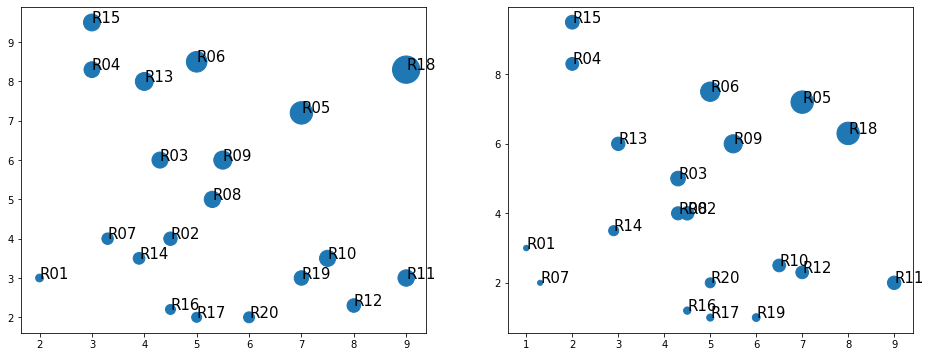

In [0]:
#@title Gráfica Comparada de Valor Esperado
# Explica el cambio del impacto y la probabilidad luego de la implementación de respuestas
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(data_df.impacto, data_df.probab, 
            s=pd.Series([np.round(float(i)*10) for i in data_df.VER]), 
            marker='o')
for j in range(20):
  plt.text(data_df.impacto[j], data_df.probab[j], 
           data_df.nombre[j],
           fontsize=15)

plt.subplot(1,2,2)
plt.scatter(data_df.impa_nuevo, data_df.prob_nueva, 
            s=pd.Series([np.round(float(i)*10) for i in data_df.VER_n]), 
            marker='o')
for j in range(20):
  plt.text(data_df.impa_nuevo[j], data_df.prob_nueva[j], 
           data_df.nombre[j],
           fontsize=15)

In [0]:
print('Valor Rescatado', sum(data_df.VER)-sum(data_df.VER_n), '\n', 'Total de costo de respuestas', sum(data_df.c_resp))

Valor Rescatado 139.6000031232834 
 Total de costo de respuestas 92.8


## Análisis de densidad de riesgos

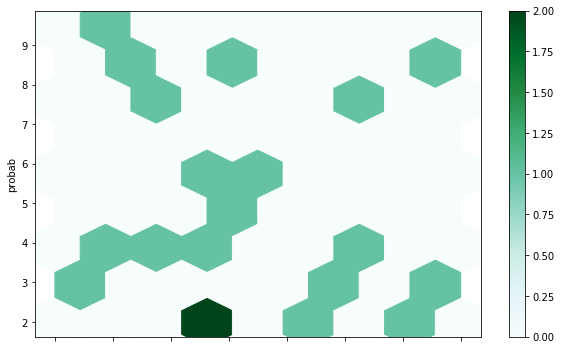

In [0]:
data_df.plot.hexbin(x='impacto', y='probab', gridsize=8, figsize=(10,6))

## Predictibilidad de Riesgos

El objetivo de la predictibilidad de riesgos es que, dada una variable (en este caso se puede elegir el surpevisor) cómo las otras variables ayudan a predecirlo. En otras palabras, a partir de variables como el Valor Esperado de Riesgos, el impacto, la probabilidad y el costo de respuesta, se puede predecir de qué supervisor se trata.

In [0]:
data_feature = data_df[['impacto', 'VER', 'c_resp']]
data_target = pd.factorize(data_df.superv)[0]+1
print(data_target)

[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2]


### Clasificación por Arbol de Decisiones

In [0]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier(max_depth=3, criterion='gini')

In [0]:
dtree.fit(data_feature, data_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

No handles with labels found to put in legend.


[Text(483.59999999999997, 380.52, 'X[1] <= 32.5\ngini = 0.665\nsamples = 20\nvalue = [7, 7, 6]'),
 Text(297.59999999999997, 271.8, 'X[0] <= 3.6\ngini = 0.633\nsamples = 16\nvalue = [7, 6, 3]'),
 Text(148.79999999999998, 163.07999999999998, 'X[1] <= 25.95\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(74.39999999999999, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(223.2, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.4, 163.07999999999998, 'X[1] <= 18.2\ngini = 0.611\nsamples = 12\nvalue = [4, 6, 2]'),
 Text(371.99999999999994, 54.360000000000014, 'gini = 0.32\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(520.8, 54.360000000000014, 'gini = 0.653\nsamples = 7\nvalue = [3, 2, 2]'),
 Text(669.5999999999999, 271.8, 'X[1] <= 45.2\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(595.1999999999999, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(743.9999999999999, 163.07999999999998, 'X[2] <= 4.45\ngini

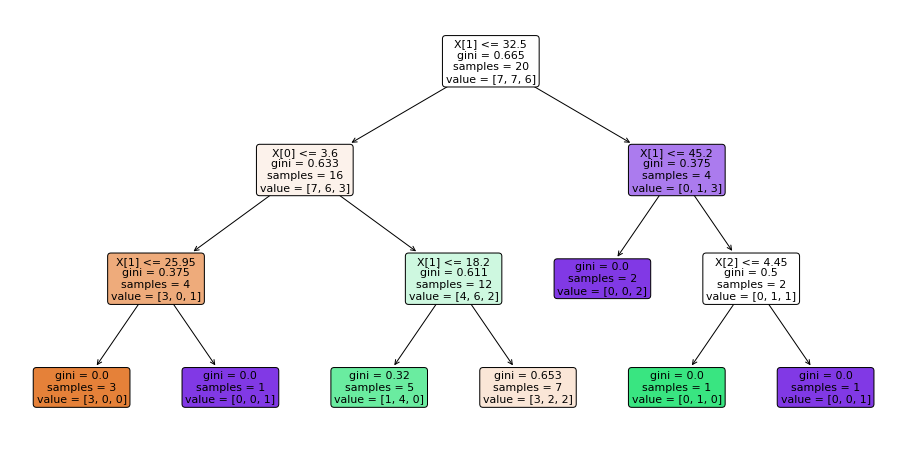

In [0]:
plt.figure(figsize=(16,8))
plt.legend(loc='right')
from statsmodels.graphics.mosaicplot import mosaic
tree.plot_tree(dtree, rounded=True, fontsize=11, label='all', filled=True)

In [0]:
prediccion = dtree.predict(np.array([[4.0, 15.0, 5.0], [1.0, 5.0, 4.0]]))
print(prediccion)

[2 1]


### Clasificación por Mosaico

In [0]:
from statsmodels.graphics.mosaicplot import mosaic
vars = ['area', 'nombre']

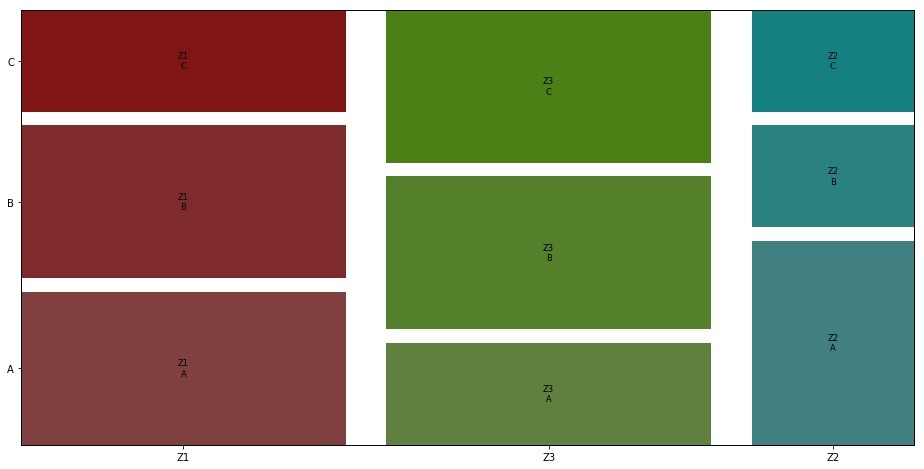

In [0]:
#base = data_df.sort_values(by=vars[0])
with plt.rc_context():
    plt.rc('figure', figsize=(16,8))
    plt.rc('font', size=10)
    mosaic(data_df, ['area', 'superv'], gap=0.05) #labelizer=labels
    plt.show()

## Modelamiento Predictivo

In [0]:
from pandas.plotting import radviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [0]:
#Convertir datos categoricos en columnas 0...1
convertidor = LabelEncoder()
data_df['area_n'] = convertidor.fit_transform(data_df['area'])
data_df['superv_n'] = convertidor.fit_transform(data_df['superv'])

In [0]:
data_X = data_df[['impacto', 'probab', 'VER_n', 'c_resp', 'superv_n']]
data_y = np.array(data_df[['area_n']]).ravel()

In [0]:
data_X.head()

,impacto,probab,VER_n,c_resp,superv_n
0,2.0,3.0,3.000000,4.3,0
1,4.5,4.0,18.000000,0.0,1
2,4.3,6.0,21.500001,4.4,2
3,3.0,8.3,16.600000,4.1,0
4,7.0,7.2,50.399999,0.0,1


In [0]:
data_y

array([0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 0])

In [0]:
model = MultinomialNB().fit(data_X, data_y)

In [0]:
X_test = [[3,4,30,4,2],[5,7,65,3,3],[5,1,65,5,2]]
prediccion = model.predict(X_test)
prediccion
convertidor.inverse_transform(prediccion)

array(['A', 'A', 'A'], dtype=object)

## Dimensionamiento del Riesgo en el Alcance

In [0]:
alcance = 100
impacto_potencial = 40
probabilidad = 0.5
alcance_asegurado = alcance - impacto_potencial * probabilidad
print(alcance_asegurado)

80.0
